## Credit Risk Dataset
## Installing required libs for intreactive developmentb

In [1]:
#Environment Setup
pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/11.0 MB 15.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 11.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/11.0 MB 8.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.0 MB 7.0 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 6.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 5.3 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 5.4 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 5.6 MB/s eta 0:00:02
   --------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pwd

'c:\\Users\\91989\\Downloads\\ML_Project\\ML-Capstone-2\\ML-Capstone-2\\Notebook'

In [36]:
## Imports Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [37]:
# Data Loading
import pandas as pd

df = pd.read_csv("../Data/credit_risk_dataset.csv")
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [38]:
#Data Understanding

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [39]:

# Data Cleaning

# Handle missing values
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

# Remove extreme outliers
df = df[df['person_income'] < 300000]
df = df[df['loan_amnt'] < 500000]  # Optional



C:\Users\91989\AppData\Local\Temp\ipykernel_20832\1059697788.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
C:\Users\91989\AppData\Local\Temp\ipykernel_20832\1059697788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

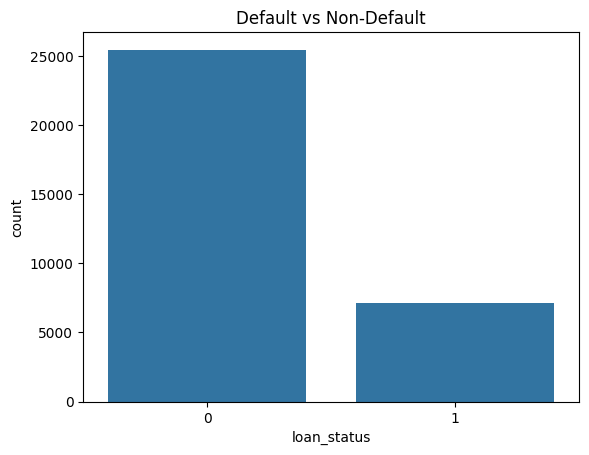

In [12]:
#Exploratory Data Analysis (EDA)
# Default Rate
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_status', data=df)
plt.title("Default vs Non-Default")
plt.show()


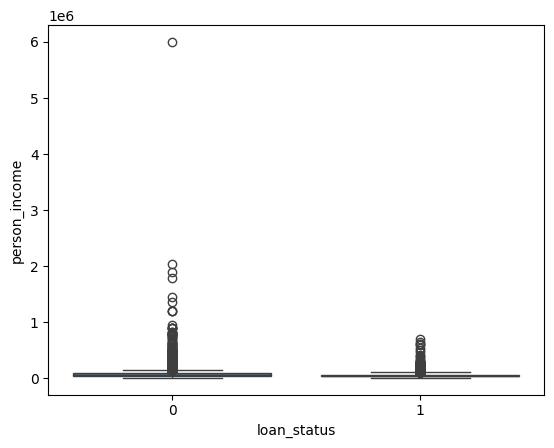

In [16]:
## Income VS Default
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.show()


In [17]:
df.select_dtypes(include=['object']).columns


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

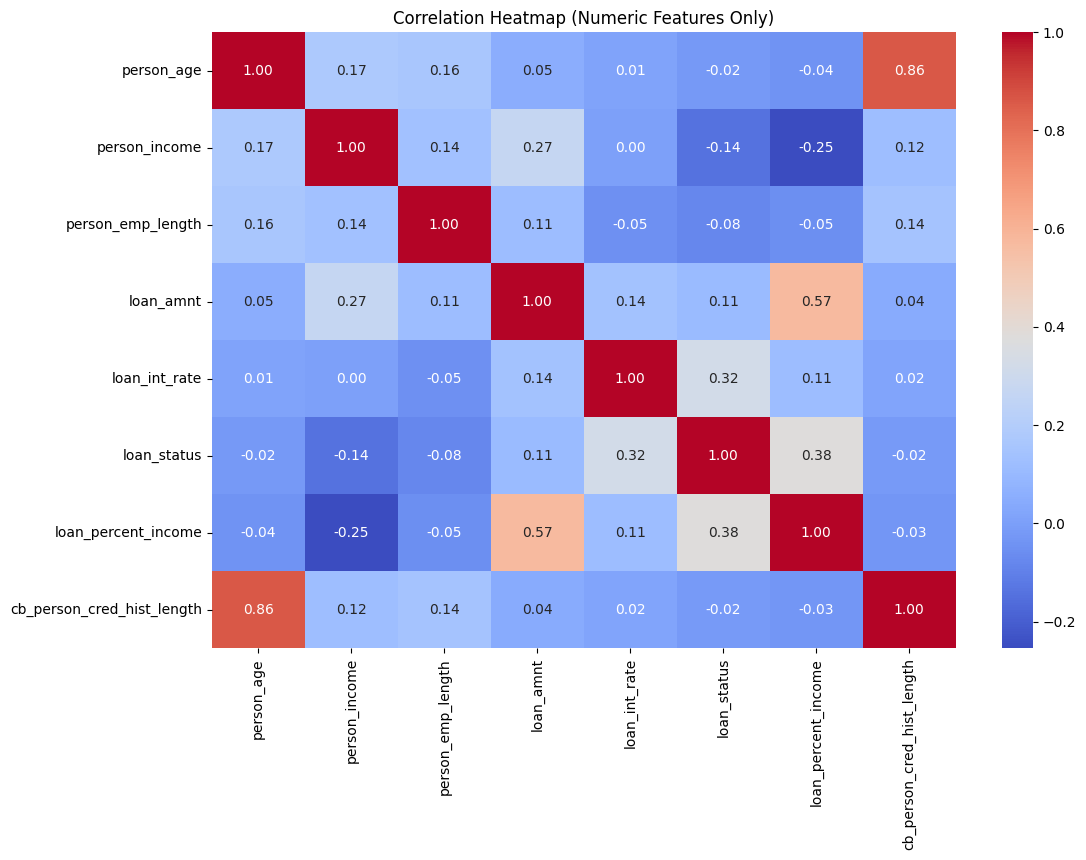

In [19]:
import numpy as np

# Select numeric columns only
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [51]:
# Encode categorical variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [52]:
## check encoded data
print(df_encoded.head())
print(df_encoded.info())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                        False                      False  ...   
1 

In [53]:
# Features & Target
X = df_encoded.drop(['loan_amnt', 'loan_status'], axis=1)  # Features
y = df_encoded['loan_amnt']  # Target


In [54]:

# Train/Validation/Test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [55]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)



In [56]:
#  Train Linear Regression Model (v1.0)
MODEL_VERSION = "v1.0"
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [57]:
#  Validation - Check Performance
y_val_pred = lr_model.predict(X_val_scaled)
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Validation R2:", r2_score(y_val, y_val_pred))


Validation MAE: 1932.7960048358468
Validation RMSE: 2970.922612665995
Validation R2: 0.7725873044370819


In [58]:
#  Model Interpretation - Feature Weights
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Weight': lr_model.coef_
}).sort_values(by='Weight', ascending=False)

print(coef_df.head(10))


                        Feature       Weight
4           loan_percent_income  5140.361721
1                 person_income  4174.736930
3                 loan_int_rate   256.595060
2             person_emp_length   162.354706
17                 loan_grade_E   120.449589
18                 loan_grade_F   112.604999
14                 loan_grade_B   102.803679
16                 loan_grade_D    87.486706
19                 loan_grade_G    69.650192
10  loan_intent_HOMEIMPROVEMENT    58.229122


In [61]:
#  Save Model & Scaler for Future Use
joblib.dump(lr_model, f"loan_amount_model_{MODEL_VERSION}.joblib")
joblib.dump(scaler, f"scaler_{MODEL_VERSION}.joblib")


['scaler_v1.0.joblib']

In [ ]:
#  Model Evolution  (v2.0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import joblib

# Train v1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

MODEL_VERSION = "v1.0"
lr_model_v1 = LinearRegression()
lr_model_v1.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred_v1 = lr_model_v1.predict(X_test_scaled)

# Save model and scaler
joblib.dump(lr_model_v1, f"loan_amount_model_{MODEL_VERSION}.joblib")
joblib.dump(scaler, f"scaler_{MODEL_VERSION}.joblib")

# Compute R2 for v1
r2_v1 = r2_score(y_test, y_test_pred_v1)
print(f"v1 R2: {r2_v1:.3f}")



v1 R2: 0.767


In [64]:
# Add new feature
df_encoded['income_per_age'] = df_encoded['person_income'] / df_encoded['person_age']

# Repeat split
X = df_encoded.drop(['loan_amnt', 'loan_status'], axis=1)
y = df_encoded['loan_amnt']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train v2
MODEL_VERSION = "v2.0"
lr_model_v2 = LinearRegression()
lr_model_v2.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred_v2 = lr_model_v2.predict(X_test_scaled)

# Save model
joblib.dump(lr_model_v2, f"loan_amount_model_{MODEL_VERSION}.joblib")
joblib.dump(scaler, f"scaler_{MODEL_VERSION}.joblib")

# Compute R2 for v2
r2_v2 = r2_score(y_test, y_test_pred_v2)
print(f"v2 R2: {r2_v1:.3f} | v2 R2: {r2_v2:.3f}")


v2 R2: 0.767 | v2 R2: 0.767


In [65]:
import pandas as pd

comparison = pd.DataFrame({
    'Version': ['v1', 'v2'],
    'R2': [r2_v1, r2_v2]
})

print(comparison)


  Version       R2
0      v1  0.76719
1      v2  0.76719
